In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.tree as tree

In [29]:
data=pd.read_csv("../A4_zoo (1).csv")
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [30]:
X=data.drop("animal_name",axis=1)
X=X.drop("class_type",axis=1)
Y=np.array(data.class_type)
X=np.array(X)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,precision_recall_fscore_support,confusion_matrix

X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
instance=DecisionTreeClassifier()
instance.fit(X_train,Y_train)
y_pred=instance.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9615384615384616

In [32]:
print(confusion_matrix(Y_test,y_pred))

[[11  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0  1  0  0  1]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  2]]


In [33]:
print(classification_report(Y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           7       0.67      1.00      0.80         2

    accuracy                           0.96        26
   macro avg       0.94      0.92      0.91        26
weighted avg       0.97      0.96      0.96        26



[Text(0.7777777777777778, 0.9375, 'x[3] <= 0.5\ngini = 0.765\nsamples = 75\nvalue = [30, 14, 3, 9, 3, 8, 8]'),
 Text(0.6666666666666666, 0.8125, 'x[1] <= 0.5\ngini = 0.791\nsamples = 45\nvalue = [0, 14, 3, 9, 3, 8, 8]'),
 Text(0.5555555555555556, 0.6875, 'x[11] <= 0.5\ngini = 0.764\nsamples = 31\nvalue = [0, 0, 3, 9, 3, 8, 8]'),
 Text(0.4444444444444444, 0.5625, 'x[9] <= 0.5\ngini = 0.698\nsamples = 22\nvalue = [0, 0, 3, 0, 3, 8, 8]'),
 Text(0.3333333333333333, 0.4375, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 0, 6]'),
 Text(0.5555555555555556, 0.4375, 'x[12] <= 5.0\ngini = 0.664\nsamples = 16\nvalue = [0, 0, 3, 0, 3, 8, 2]'),
 Text(0.3333333333333333, 0.3125, 'x[5] <= 0.5\ngini = 0.612\nsamples = 7\nvalue = [0, 0, 3, 0, 3, 0, 1]'),
 Text(0.2222222222222222, 0.1875, 'x[8] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 3, 0, 0, 0, 1]'),
 Text(0.1111111111111111, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 1]'),
 Text(0.3333333333333333, 0.0625, 'gini = 0.0\ns

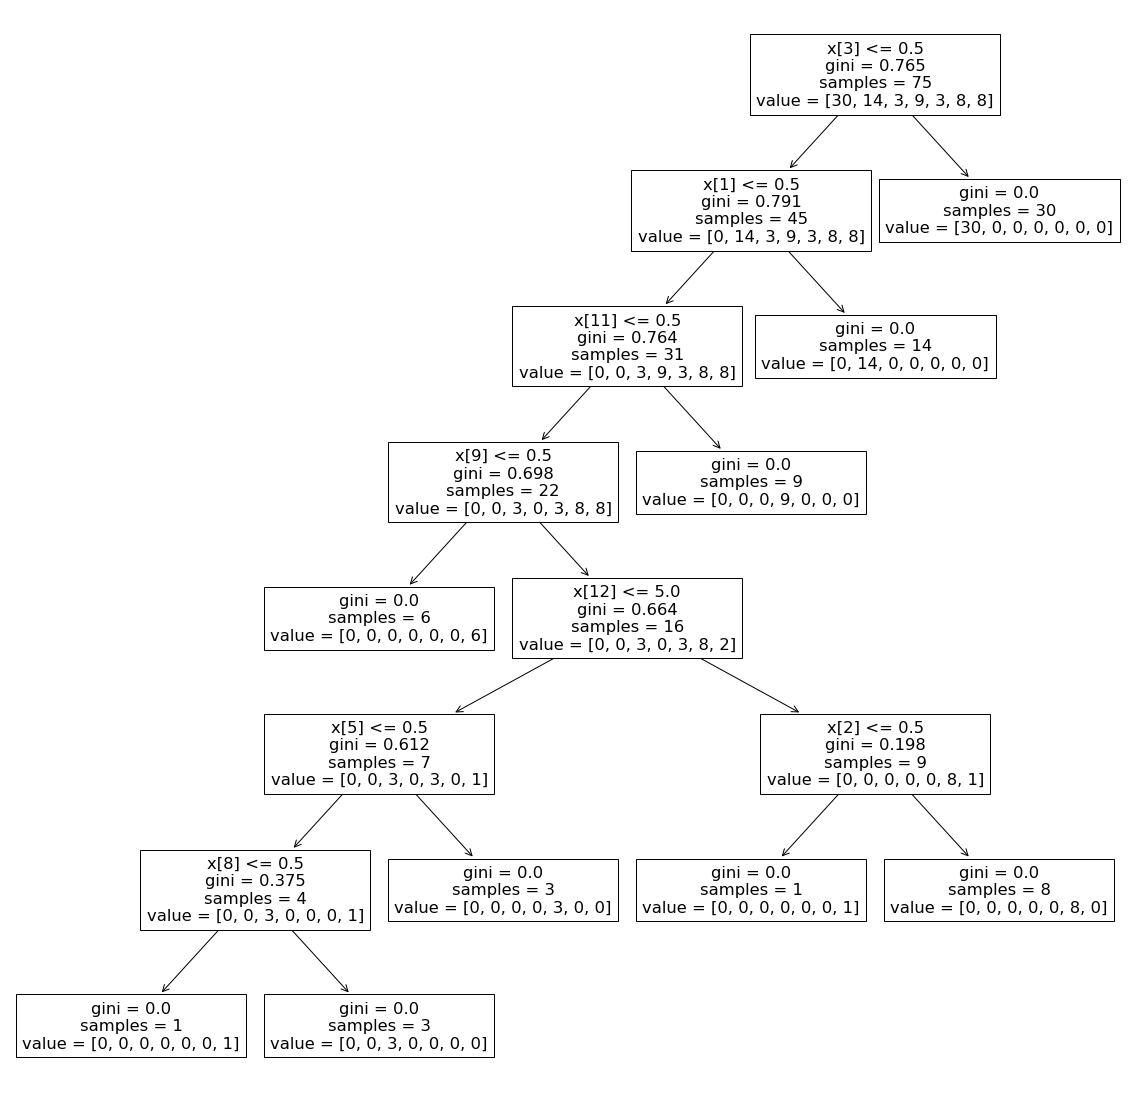

In [34]:
import graphviz
plt.figure(figsize=(20,20))
tree.plot_tree(instance)